In [11]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [12]:
import requests
import pandas as pd
import datetime as dt

# Step 1: Get a list of all available USDT pairs from Binance API
def get_usdt_pairs():
    url = "https://api.binance.com/api/v3/exchangeInfo"
    data = requests.get(url).json()
    usdt_pairs = [
        s['symbol'] for s in data['symbols']
        if s['quoteAsset'] == 'USDT' and s['status'] == 'TRADING'
    ]
    return usdt_pairs

# Retrieve all USDT trading pairs
usdt_cryptos = get_usdt_pairs()

# Step 2: Print top 30 popular cryptocurrencies
top_cryptos = sorted([c for c in usdt_cryptos if c.endswith('USDT')])
print("Top 30 Cryptocurrencies on Binance (USDT pairs):")
for i, crypto in enumerate(top_cryptos[:30]):
    print(f"{i + 1}. {crypto}")



Top 30 Cryptocurrencies on Binance (USDT pairs):
1. 1000CATUSDT
2. 1000CHEEMSUSDT
3. 1000SATSUSDT
4. 1INCHUSDT
5. 1MBABYDOGEUSDT
6. AAVEUSDT
7. ACAUSDT
8. ACEUSDT
9. ACHUSDT
10. ACMUSDT
11. ACTUSDT
12. ACXUSDT
13. ADAUSDT
14. ADXUSDT
15. AEURUSDT
16. AEVOUSDT
17. AGLDUSDT
18. AIUSDT
19. AIXBTUSDT
20. ALCXUSDT
21. ALGOUSDT
22. ALICEUSDT
23. ALPACAUSDT
24. ALPHAUSDT
25. ALPINEUSDT
26. ALTUSDT
27. AMPUSDT
28. ANIMEUSDT
29. ANKRUSDT
30. APEUSDT


In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron
import warnings


In [14]:
start_time = dt.datetime(2023, 1, 1)
end_time = dt.datetime.today()

def get_data_binance(symbol, interval, startTime, endTime):
    url = "https://api.binance.com/api/v3/klines"
    data = []

    while startTime < endTime:
        chunk_end = min(startTime + dt.timedelta(days=30), endTime)
        start_ms = str(int(startTime.timestamp() * 1000))
        end_ms = str(int(chunk_end.timestamp() * 1000))
        
        req_params = {
            "symbol": symbol,
            'interval': interval,
            'startTime': start_ms,
            'endTime': end_ms,
            'limit': '1000'
        }
        
        response = requests.get(url, params=req_params)
        new_data = response.json()
        
        if not new_data:
            break
        
        data.extend(new_data)
        startTime = chunk_end

    df = pd.DataFrame(data)
    if df.empty:
        return None
    
    df = df.iloc[:, 0:6]
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
    df['close'] = df['close'].astype(float)
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    df.set_index('datetime', inplace=True)

    return df[['close']]
selected_cryptos = ['BNBUSDT', 'SOLUSDT', 'LTCUSDT', 'XRPUSDT', 'DOGEUSDT', 'ALPHAUSDT', 'ALPINEUSDT']

cryptocurrency_data = {}

for crypto in selected_cryptos:
    print(f"\nDownloading data for {crypto}...")
    data = get_data_binance(crypto, '1h', start_time, end_time)
    cryptocurrency_data[crypto] = data

for crypto, data in cryptocurrency_data.items():
    print(f"\nFirst 5 rows of {crypto}:")
    print(data.head())

print("\nData downloaded successfully!")









First 5 rows of BNBUSDT:
                     close
datetime                  
2022-12-31 21:00:00  247.0
2022-12-31 22:00:00  246.3
2022-12-31 23:00:00  246.3
2023-01-01 00:00:00  245.7
2023-01-01 01:00:00  245.8

First 5 rows of SOLUSDT:
                     close
datetime                  
2022-12-31 21:00:00  10.01
2022-12-31 22:00:00   9.95
2022-12-31 23:00:00   9.97
2023-01-01 00:00:00   9.99
2023-01-01 01:00:00  10.04

First 5 rows of LTCUSDT:
                     close
datetime                  
2022-12-31 21:00:00  70.23
2022-12-31 22:00:00  70.09
2022-12-31 23:00:00  70.14
2023-01-01 00:00:00  69.31
2023-01-01 01:00:00  69.51

First 5 rows of XRPUSDT:
                      close
datetime                   
2022-12-31 21:00:00  0.3420
2022-12-31 22:00:00  0.3407
2022-12-31 23:00:00  0.3389
2023-01-01 00:00:00  0.3385
2023-01-01 01:00:00  0.3387

First 5 rows of DOGEUSDT:
                       close
datetime                    
2022-12-31 21:00:00  0.07044
2022-12-31 2

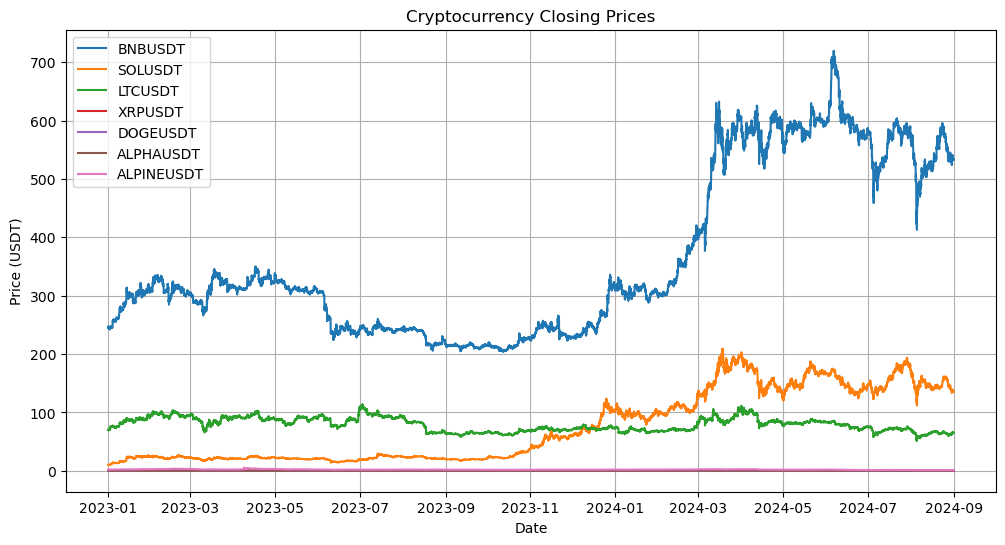


Performing Stationarity Tests...

    Crypto             ADF p-value              PP p-value          KPSS p-value ADF p-value (diff) PP p-value (diff) KPSS p-value (diff)
   BNBUSDT 0.8197 (Non-stationary) 0.8153 (Non-stationary) 0.01 (Non-stationary)   0.0 (Stationary)  0.0 (Stationary)    0.1 (Stationary)
   SOLUSDT 0.7969 (Non-stationary) 0.7707 (Non-stationary) 0.01 (Non-stationary)   0.0 (Stationary)  0.0 (Stationary)    0.1 (Stationary)
   LTCUSDT 0.0546 (Non-stationary)     0.0437 (Stationary) 0.01 (Non-stationary)   0.0 (Stationary)  0.0 (Stationary)    0.1 (Stationary)
   XRPUSDT     0.0215 (Stationary)     0.0158 (Stationary) 0.01 (Non-stationary)   0.0 (Stationary)  0.0 (Stationary)    0.1 (Stationary)
  DOGEUSDT 0.3763 (Non-stationary) 0.3541 (Non-stationary) 0.01 (Non-stationary)   0.0 (Stationary)  0.0 (Stationary)    0.1 (Stationary)
 ALPHAUSDT 0.1142 (Non-stationary) 0.0957 (Non-stationary) 0.01 (Non-stationary)   0.0 (Stationary)  0.0 (Stationary)    0.1 (Stationary)

In [36]:
# ---------- Selected Cryptos ----------
start_date = dt.datetime(2023, 1, 1)
end_date = dt.datetime(2025, 1, 1)


all_data = {}
merged_df = pd.concat([cryptocurrency_data[crypto]['close'] for crypto in selected_cryptos], axis=1)
merged_df.columns = selected_cryptos

#splitting the data for train and test
merged_df.index = pd.to_datetime(merged_df.index)
split_date = pd.to_datetime('2024-09-01')
# Train: Jan 1, 2022 - Dec 31, 2023
train_df = merged_df[merged_df.index < split_date]
# Test: Jan 1, 2024 - Jan 1, 2025
test_df = merged_df[(merged_df.index >= split_date) & (merged_df.index < end_date)]

# ---------- Plotting Function ----------
def plot_cryptocurrencies(df, selected_cryptos):
    """
    Plots the closing price of selected cryptocurrencies.
    """
    plt.figure(figsize=(12, 6))
    
    for crypto in selected_cryptos:
        plt.plot(df.index, df[crypto], label=crypto)
    
    plt.title("Cryptocurrency Closing Prices")
    plt.xlabel("Date")
    plt.ylabel("Price (USDT)")
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------- Stationarity Test Functions ----------

def interpret_result(pval, test='ADF'):
    if pd.isna(pval):
        return "N/A"
    if test in ['ADF', 'PP']:
        return "Stationary" if pval < 0.05 else "Non-stationary"
    elif test == 'KPSS':
        return "Non-stationary" if pval < 0.05 else "Stationary"

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result[1]  # return p-value

def kpss_test(series):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        result = kpss(series, regression='c', nlags="auto")
    return result[1]  # return p-value

def pp_test(series):
    result = PhillipsPerron(series)
    return result.pvalue


# ---------- Main Execution ----------
def main():
    # Passing train_df to plot_cryptocurrencies
    plot_cryptocurrencies(train_df, selected_cryptos)  # Use train_df for plotting
    print("\nPerforming Stationarity Tests...\n")

    results = {
        'Crypto': [],
        'ADF p-value': [],
        'PP p-value': [],
        'KPSS p-value': [],
        'ADF p-value (diff)': [],
        'PP p-value (diff)': [],
        'KPSS p-value (diff)': []
    }

    for crypto in selected_cryptos:
        series = train_df[crypto].dropna()
        diff_series = series.diff().dropna()

        results['Crypto'].append(crypto)
        results['ADF p-value'].append(f"{round(adf_test(series), 4)} ({interpret_result(adf_test(series), 'ADF')})")
        results['PP p-value'].append(f"{round(pp_test(series), 4)} ({interpret_result(pp_test(series), 'PP')})")
        results['KPSS p-value'].append(f"{round(kpss_test(series), 4)} ({interpret_result(kpss_test(series), 'KPSS')})")
        results['ADF p-value (diff)'].append(f"{round(adf_test(diff_series), 4)} ({interpret_result(adf_test(diff_series), 'ADF')})")
        results['PP p-value (diff)'].append(f"{round(pp_test(diff_series), 4)} ({interpret_result(pp_test(diff_series), 'PP')})")
        results['KPSS p-value (diff)'].append(f"{round(kpss_test(diff_series), 4)} ({interpret_result(kpss_test(diff_series), 'KPSS')})")

    result_df = pd.DataFrame(results)
    print(result_df.to_string(index=False))

# Run it
if __name__ == "__main__":
    main()


In [38]:
import statsmodels.api as sm
prices = (train_df)

Y = prices['BNBUSDT']
X = prices[['SOLUSDT' , 'ALPHAUSDT', 'ALPINEUSDT','DOGEUSDT']]  # Independents

X = sm.add_constant(X)  # Add intercept
model = sm.OLS(Y, X).fit()
print(model.summary())

# Get residuals
residuals = model.resid


                            OLS Regression Results                            
Dep. Variable:                BNBUSDT   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.744e+04
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:48:28   Log-Likelihood:                -77659.
No. Observations:               14638   AIC:                         1.553e+05
Df Residuals:                   14633   BIC:                         1.554e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.4192      2.025     48.109      0.0

In [39]:
# Get residuals
residuals = model.resid

# ADF test on residuals (Engle-Granger Step 2)
adf_result = adfuller(residuals)
print(f"\nADF statistic (residuals): {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("✅ Residuals are stationary → Cointegration exists.")
else:
    print("❌ Residuals are non-stationary → No cointegration.")


ADF statistic (residuals): -3.4714653879262207
p-value: 0.008750886861392615
✅ Residuals are stationary → Cointegration exists.


In [48]:
# KPSS test on residuals
kpss_result_resid = kpss(residuals)
print("KPSS test statistic:", kpss_result_resid[0])
print("p-value:", kpss_result_resid[1])

# PP test on residuals
# PP test on residuals
pp_result_resid = PhillipsPerron(residuals)

# Assuming PhillipsPerron returns an object with 'stat' and 'pvalue' attributes
print("PP test statistic:", pp_result_resid.stat)
print("p-value:", pp_result_resid.pvalue)



KPSS test statistic: 2.712168893283604
p-value: 0.01
PP test statistic: -3.8040125214807645
p-value: 0.002866527420018392


C:\Users\user\AppData\Local\Temp\ipykernel_33748\166866369.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_resid = kpss(residuals)


In [53]:
# Coefficients 
intercept = 7.1183
coef_solusdt = 0.0399
coef_alphausdt = -0.4303
coef_alpineusdt = 0.2069
coef_dogeusdt = 1.0738


train_df = train_df.copy()

# Calculating the spread using the regression equation
train_df['spread'] = (
    train_df['BNBUSDT']
    - (coef_dogeusdt * train_df['DOGEUSDT']
       + coef_solusdt * train_df['SOLUSDT']
       + coef_alphausdt * train_df['ALPHAUSDT']
       + coef_alpineusdt * train_df['ALPINEUSDT'])
)

print(train_df[['BNBUSDT', 'DOGEUSDT', 'SOLUSDT', 'ALPHAUSDT', 'ALPINEUSDT', 'spread']].head())


                     BNBUSDT  DOGEUSDT  SOLUSDT  ALPHAUSDT  ALPINEUSDT  \
datetime                                                                 
2022-12-31 21:00:00    247.0   0.07044    10.01     0.0667      2.0220   
2022-12-31 22:00:00    246.3   0.07025     9.95     0.0666      2.0225   
2022-12-31 23:00:00    246.3   0.07025     9.97     0.0667      2.0235   
2023-01-01 00:00:00    245.7   0.06980     9.99     0.0652      2.0168   
2023-01-01 01:00:00    245.8   0.06994    10.04     0.0655      2.0136   

                         spread  
datetime                         
2022-12-31 21:00:00  246.135312  
2022-12-31 22:00:00  245.437763  
2022-12-31 23:00:00  245.436801  
2023-01-01 00:00:00  244.837227  
2023-01-01 01:00:00  244.935873  


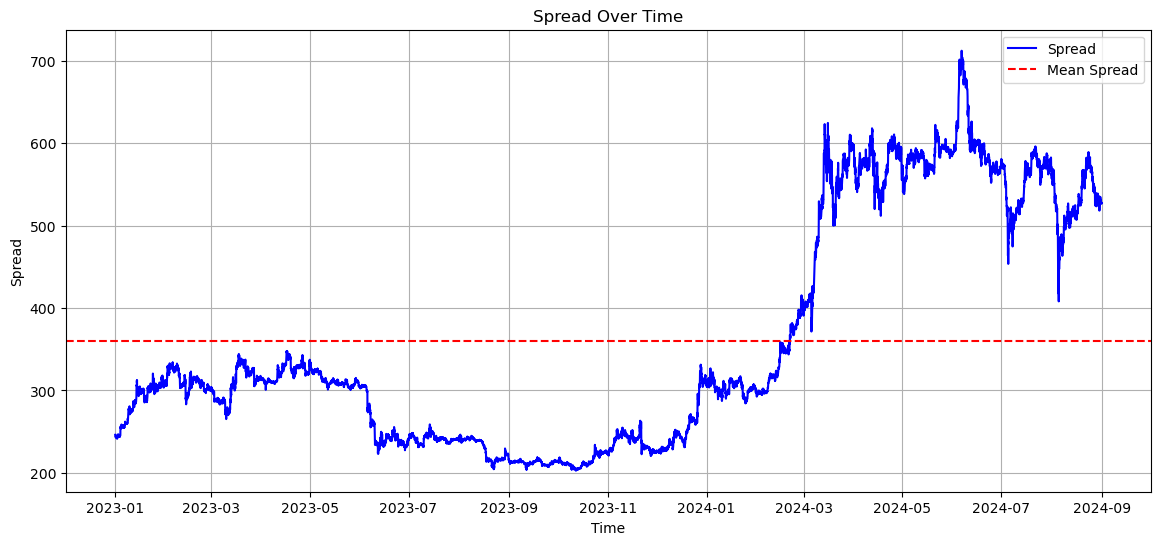

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train_df.index, train_df['spread'], label='Spread', color='blue')
plt.axhline(train_df['spread'].mean(), color='red', linestyle='--', label='Mean Spread')
plt.title('Spread Over Time')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()


If the p-value < 0.05, the spread is stationary → good candidate for mean-reversion strategy.

Q2

In [55]:
import numpy as np
# Calculate mean and standard deviation of the spread
spread_mean = train_df['spread'].mean()
spread_std = train_df['spread'].std()

# Calculate z-scores
train_df['z_score'] = (train_df['spread'] - spread_mean) / spread_std

# Display the z-scores to check
train_df[['spread', 'z_score']].head()

,spread,z_score
datetime,,
2022-12-31 21:00:00,246.135312,-0.811176
2022-12-31 22:00:00,245.437763,-0.816161
2022-12-31 23:00:00,245.436801,-0.816167
2023-01-01 00:00:00,244.837227,-0.820452
2023-01-01 01:00:00,244.935873,-0.819747


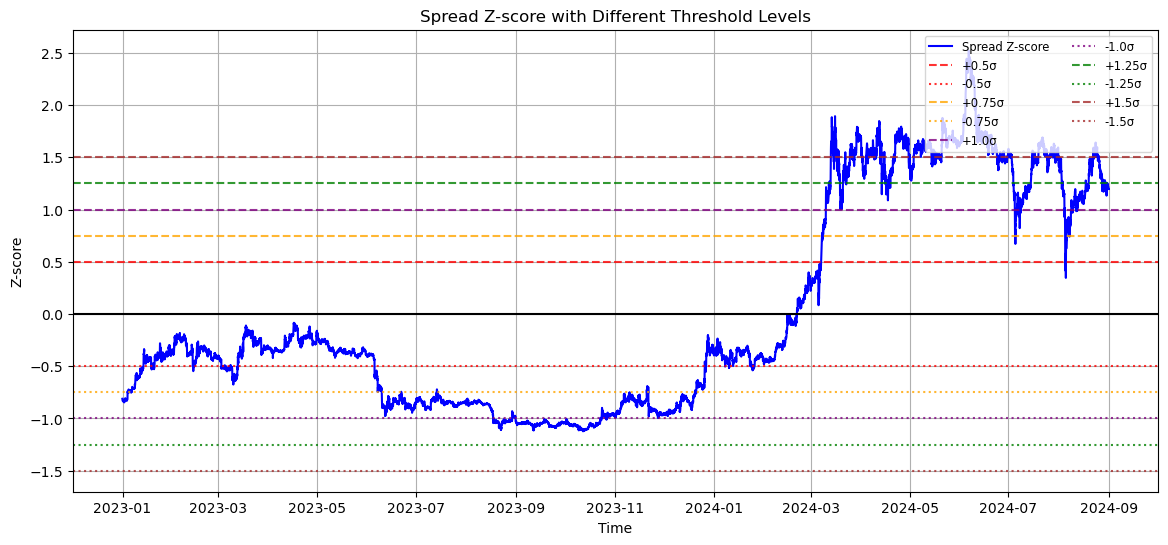

In [56]:
import matplotlib.pyplot as plt

# Thresholds
threshold_multiples = [0.5, 0.75, 1.0, 1.25, 1.5]
colors = ['red', 'orange', 'purple', 'green', 'brown']  

plt.figure(figsize=(14,6))
plt.plot(train_df['z_score'].index, train_df['z_score'], label="Spread Z-score", color='blue')

for c, color in zip(threshold_multiples, colors):
    plt.axhline(y=c, color=color, linestyle='--', alpha=0.8, label=f'+{c}σ')
    plt.axhline(y=-c, color=color, linestyle=':', alpha=0.8, label=f'-{c}σ')

plt.axhline(0, color='black', linestyle='-')  # Zero line
plt.title('Spread Z-score with Different Threshold Levels')
plt.xlabel('Time')
plt.ylabel('Z-score')
plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.grid(True)
plt.show()


In [58]:
threshold_multiples = [0.5, 0.75, 1.0, 1.25, 1.5]
spread = train_df['spread']
mean_spread_train = spread.mean()
std_spread_train = spread.std()
thresholds = [(mean_spread_train - c * std_spread_train, mean_spread_train + c * std_spread_train) for c in threshold_multiples]


In [59]:
def backtest_strategy_train(train_df, lower_bound, upper_bound, mean_spread_train, std_spread_train):
    position = None  # None = no position, 'long' = long position, 'short' = short position
    entry_time = None
    entry_price = None
    trades = []
    
    equity = 0
    equity_curve = []
    
    for t in range(len(train_df)):
        spread = train_df.iloc[t]['spread']
        time = train_df.index[t]
        
        # Entry conditions (long or short)
        if position is None:
            if spread < lower_bound:
                position = 'long'
                entry_time = time
                entry_price = spread  # This is the spread at entry
            elif spread > upper_bound:
                position = 'short'
                entry_time = time
                entry_price = spread  # This is the spread at entry
                
        # Exit conditions for long and short
        elif position == 'long':
            if spread >= mean_spread_train:  # Exit long when spread is mean or greater
                profit = spread - entry_price  # PnL based on spread difference
                trades.append(profit)
                equity += profit
                equity_curve.append(equity)
                position = None
        elif position == 'short':
            if spread <= mean_spread_train:  # Exit short when spread is mean or lower
                profit = entry_price - spread  # PnL based on spread difference
                trades.append(profit)
                equity += profit
                equity_curve.append(equity)
                position = None

    # If still open position at the end, close at last spread
    if position is not None:
        final_spread = train_df.iloc[-1]['spread']
        if position == 'long':
            profit = final_spread - entry_price
        else:
            profit = entry_price - final_spread
        trades.append(profit)
        equity += profit
        equity_curve.append(equity)
        
    return trades, equity_curve

In [60]:
summary_stats_train = []

for c in threshold_multiples:
    lower_bound = mean_spread_train - c * std_spread_train
    upper_bound = mean_spread_train + c * std_spread_train
    
    trades, equity_curve = backtest_strategy_train(train_df, lower_bound, upper_bound, mean_spread_train, std_spread_train)
    
    # Calculate performance metrics
    num_trades = len(trades)
    net_pl = np.sum(trades)
    avg_trade_pl = np.mean(trades) if num_trades > 0 else 0
    largest_winner = np.max(trades) if num_trades > 0 else 0
    largest_loser = np.min(trades) if num_trades > 0 else 0
    percent_positive = 100 * np.mean(np.array(trades) > 0) if num_trades > 0 else 0
    percent_negative = 100 - percent_positive
    gross_profit = np.sum([p for p in trades if p > 0])
    gross_loss = np.sum([p for p in trades if p < 0])
    sharpe = (np.mean(trades) / np.std(trades)) * np.sqrt(252) if len(trades) > 1 else 0
    max_drawdown = np.max(np.maximum.accumulate(equity_curve) - equity_curve) if len(equity_curve) > 0 else 0
    profit_to_drawdown = net_pl / max_drawdown if max_drawdown != 0 else np.nan
    max_equity = np.max(equity_curve) if len(equity_curve) > 0 else 0
    min_equity = np.min(equity_curve) if len(equity_curve) > 0 else 0
    end_equity = equity_curve[-1] if len(equity_curve) > 0 else 0

    summary_stats_train.append({
        'Threshold (s)': c,
        'Num.Trades': num_trades,
        'Net.Trading.PL': net_pl,
        'Avg.Trade.PL': avg_trade_pl,
        'Largest.Winner': largest_winner,
        'Largest.Loser': largest_loser,
        'Gross.Profits': gross_profit,
        'Gross.Losses': gross_loss,
        'Percent.Positive': percent_positive,
        'Percent.Negative': percent_negative,
        'Sharpe Ratio': sharpe,
        'Max.Drawdown': max_drawdown,
        'Profit.To.MaxDraw': profit_to_drawdown,
        'Max.Equity': max_equity,
        'Min.Equity': min_equity,
        'End.Equity': end_equity
    })

# Create a DataFrame of results
train_results_df = pd.DataFrame(summary_stats_train)
print(train_results_df)



   Threshold (s)  Num.Trades  Net.Trading.PL  Avg.Trade.PL  Largest.Winner  \
0           0.50           2       17.716790      8.858395      114.039104   
1           0.75           2       55.110542     27.555271      114.039104   
2           1.00           2      125.713172     62.856586      146.228852   
3           1.25           1       10.035920     10.035920       10.035920   
4           1.50           1       52.388708     52.388708       52.388708   

   Largest.Loser  Gross.Profits  Gross.Losses  Percent.Positive  \
0     -96.322313     114.039104    -96.322313              50.0   
1     -58.928561     114.039104    -58.928561              50.0   
2     -20.515679     146.228852    -20.515679              50.0   
3      10.035920      10.035920      0.000000             100.0   
4      52.388708      52.388708      0.000000             100.0   

   Percent.Negative  Sharpe Ratio  Max.Drawdown  Profit.To.MaxDraw  \
0              50.0      1.336963     96.322313           

Threshold 1 seems to be the most risk-adjusted, with the highest Sharpe ratio, minimal drawdown, and higher profit-to-drawdown ratio. 

In [68]:
# Make a copy of the test set
test_df = test_df.copy()

# Calculate spread for test set using previously trained model
test_df.loc[:, 'spread'] = (
    test_df['BNBUSDT']
    - (+ coef_dogeusdt  * test_df['DOGEUSDT']
       + coef_solusdt * test_df['SOLUSDT']
       + coef_alphausdt * test_df['ALPHAUSDT']
       + coef_alpineusdt * test_df['ALPINEUSDT'])
)



In [69]:
mean_spread_test = test_df['spread'].mean()
std_spread_test = test_df['spread'].std()

test_df['z_score'] = (test_df['spread'] - mean_spread_test) / std_spread_test


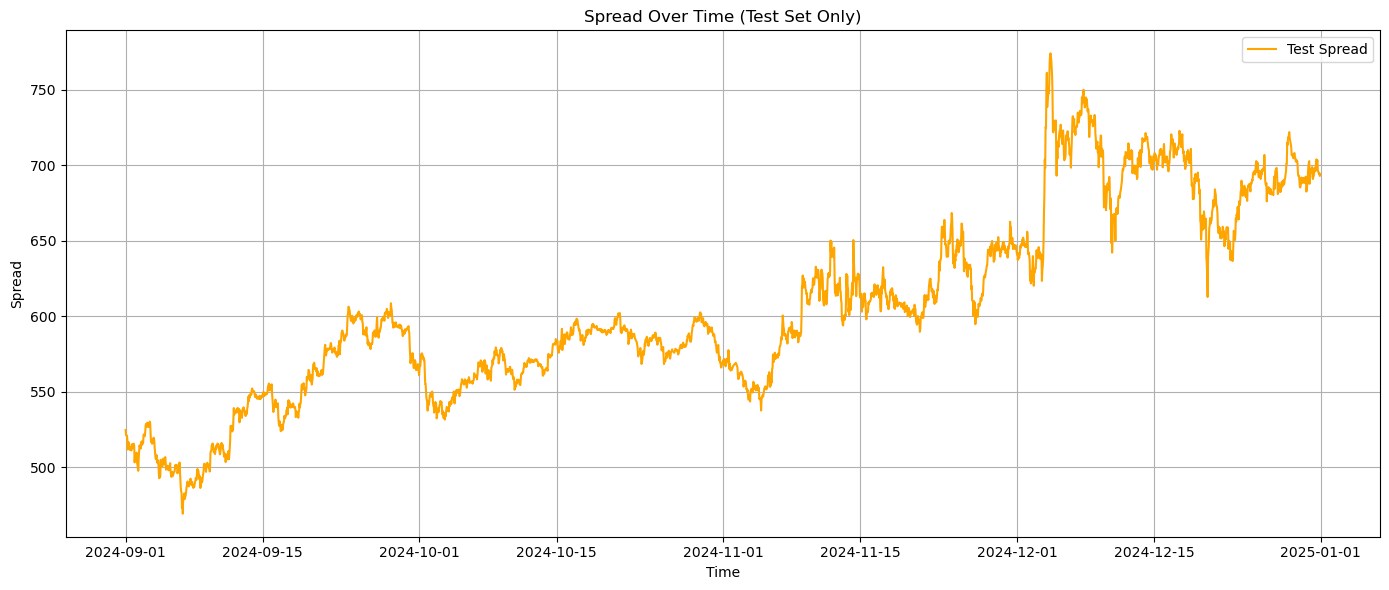

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(test_df.index, test_df['spread'], label='Test Spread', color='orange')
plt.title('Spread Over Time (Test Set Only)')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


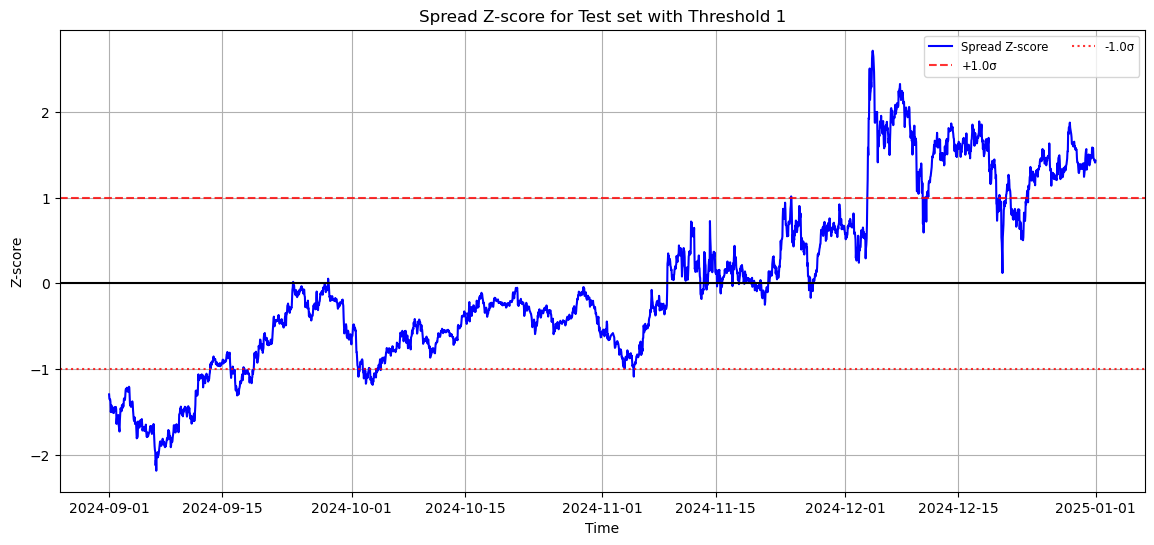

In [71]:
import matplotlib.pyplot as plt

threshold_multiples = [1.0]
colors = ['red']  

plt.figure(figsize=(14,6))
plt.plot(test_df['z_score'].index, test_df['z_score'], label="Spread Z-score", color='blue')

# Plot thresholds with different colors
for c, color in zip(threshold_multiples, colors):
    plt.axhline(y=c, color=color, linestyle='--', alpha=0.8, label=f'+{c}σ')
    plt.axhline(y=-c, color=color, linestyle=':', alpha=0.8, label=f'-{c}σ')

plt.axhline(0, color='black', linestyle='-')  # Zero line
plt.title('Spread Z-score for Test set with Threshold 1')
plt.xlabel('Time')
plt.ylabel('Z-score')
plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.grid(True)
plt.show()


In [72]:
def backtest_strategy(df, lower_bound, upper_bound, mean_spread, std_spread):
    in_position = False
    position_type = None  # 'long' or 'short'
    entry_price = 0
    trades = []
    equity_curve = []
    equity = 0

    for i in range(len(df)):
        z = df['z_score'].iloc[i]
        spread = df['spread'].iloc[i]

        if not in_position:
            if z < lower_bound:
                # Long the spread
                in_position = True
                position_type = 'long'
                entry_price = spread
            elif z > upper_bound:
                # Short the spread
                in_position = True
                position_type = 'short'
                entry_price = spread

        elif in_position:
            if (position_type == 'long' and z >= 0) or (position_type == 'short' and z <= 0):
                # Exit position
                pnl = spread - entry_price if position_type == 'long' else entry_price - spread
                trades.append(pnl)
                equity += pnl
                equity_curve.append(equity)
                in_position = False
                position_type = None
        equity_curve.append(equity)  # Track even when not trading

    return trades, equity_curve


In [73]:
# Use threshold 1.0 (you can loop over more)
c = 1.0
lower_bound = -c
upper_bound = c

trades_test, equity_curve_test = backtest_strategy(test_df, lower_bound, upper_bound, mean_spread_test, std_spread_test)

print(f"Total Trades: {len(trades_test)}")
print(f"Net P&L: {np.sum(trades_test):.2f}")
print(f"Average Trade P&L: {np.mean(trades_test):.2f}" if trades_test else "No trades.")


Total Trades: 3
Net P&L: 226.56
Average Trade P&L: 75.52


Z > 1: Short the spread (short BNBUSDT, long the basket)

Z < -1: Long the spread (long BNBUSDT, short the basket)

Z → 0: Close positions

BONUS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# test period for bonus
bonus_start = dt.datetime(2025, 3, 10)
bonus_end = dt.datetime(2025, 4, 10)

bonus_df = pd.DataFrame()
for crypto in selected_cryptos:
    print(f"\nDownloading data for {crypto}...")
    data = get_data_binance(crypto, '1h', bonus_start, bonus_end)
    bonus_df[crypto] = data

intercept = 7.1183
coef_solusdt = 0.0399
coef_alphausdt = -0.4303
coef_alpineusdt = 0.2069
coef_dogeusdt = 1.0738


#recalculating spread
if 'spread' not in bonus_df.columns:
    bonus_df['spread'] = (
        bonus_df['BNBUSDT']
        - (+ coef_dogeusdt * bonus_df['DOGEUSDT']
           + coef_solusdt * bonus_df['SOLUSDT']
           + coef_alphausdt * bonus_df['ALPHAUSDT']
           + coef_alpineusdt * bonus_df['ALPINEUSDT'])
    )

# Parameters for rolling strategy
rolling_window = 72
entry_threshold = 1.0
exit_threshold = 0.0

# Calculating dynamic z-scores
bonus_df['rolling_mean'] = bonus_df['spread'].rolling(window=rolling_window).mean()
bonus_df['rolling_std'] = bonus_df['spread'].rolling(window=rolling_window).std()
bonus_df['z_score_dynamic'] = (bonus_df['spread'] - bonus_df['rolling_mean']) / bonus_df['rolling_std']

# Backtest with dynamic z-score thresholds
def dynamic_backtest(df, entry_thres, exit_thres):
    position = None
    entry_price = None
    trades = []
    equity = 0
    equity_curve = []

    for i in range(len(df)):
        z = df.iloc[i]['z_score_dynamic']
        spread = df.iloc[i]['spread']

        # Entry
        if position is None:
            if z < -entry_thres:
                position = 'long'
                entry_price = spread
            elif z > entry_thres:
                position = 'short'
                entry_price = spread

        # Exit
        elif position == 'long' and z >= exit_thres:
            profit = spread - entry_price
            trades.append(profit)
            equity += profit
            equity_curve.append(equity)
            position = None

        elif position == 'short' and z <= exit_thres:
            profit = entry_price - spread
            trades.append(profit)
            equity += profit
            equity_curve.append(equity)
            position = None

    return trades, equity_curve

# backtest
bonus_trades, bonus_equity_curve = dynamic_backtest(bonus_df, entry_threshold, exit_threshold)

print("Dynamic Strategy (Bonus Period)")
print(f"Total Trades: {len(bonus_trades)}")
print(f"Net P&L: {sum(bonus_trades):.2f}")
if bonus_trades:
    print(f"Average Trade P&L: {np.mean(bonus_trades):.2f}")
